# **Assignment 2 Karim Aboudaoud 900212779** 

# **Part 1: International Soccer**

**Abstract**

I chose five different countries from the data set which are Chile, Croatia, Saudi Arabia, Japan and Uruguay.

For each country, I measured the confidence interval of winning and losing in an official game and a friendly game, and the confidence interval of winning in a home game in a stadium (in this certain country) and in away games. 

The friendly and official game helped me interpret the difference in seriousness of performance of players in these different kinds of matches.
The home games helped me determine the effect of fans and playing in your own country. 

The following codes will help us understand which country is better in terms of winning and why. 

The description of each confidence interval can be found under each graph.

The conclusion can be found at the end of the notebook. 

**Preparing Data for Manipulation**

In [181]:
import pandas as pd 

In [182]:
import matplotlib.pyplot as plt

In [183]:
import statsmodels.api as sm

In [184]:
from statsmodels.stats.proportion import proportion_confint

In [185]:
df=pd.read_csv('results.csv')

In [186]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [187]:
df.shape

(43188, 9)

In [188]:
x=df['home_score']-df['away_score']
conditions=[(x>0),(x<0),(x==0)]

In [189]:
x

In [190]:
conditions=[(x>0),(x<0),(x==0)]

In [191]:
values=['win','lose','draw']

In [192]:
import numpy as np

In [193]:
df['results']=np.select(conditions,values)

In [194]:
df['results']

In [195]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [196]:
x=df['results'].value_counts()

In [197]:
x=df['results'].value_counts()

In [198]:
x=np.array(x)

In [199]:
x

In [200]:
N=x.sum()

In [201]:
N

43188

In [202]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [203]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [204]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [205]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [206]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [207]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [208]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

**Country 1: Chile**

In [209]:
dfchi=df[df['country']=='Chile']

In [210]:
dfchi.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
271,9/11/1910,Chile,Argentina,0,3,Friendly,Viña del Mar,Chile,False,lose
375,9/21/1913,Chile,Argentina,0,2,Friendly,Viña del Mar,Chile,False,lose
555,9/11/1920,Chile,Brazil,0,1,Copa América,Viña del Mar,Chile,False,lose
556,9/12/1920,Uruguay,Argentina,1,1,Copa América,Viña del Mar,Chile,True,draw
557,9/18/1920,Brazil,Uruguay,0,6,Copa América,Viña del Mar,Chile,True,lose


In [211]:
conditions = [
    (dfchi['tournament']=='Friendly'),
    (dfchi['tournament']!='Friendly')    ]

In [212]:
values=['Friendly','Official']

In [213]:
dfchi['typematch'] = np.select(conditions, values)

<ipython-input-213-c709d5b39ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchi['typematch'] = np.select(conditions, values)


In [214]:
dfchi['typematch'].value_counts()

Comparing the probability of win/lose by match type:

In [215]:
x=pd.crosstab(dfchi['typematch'],dfchi['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,24,34,81,139
Official,57,76,143,276
All,81,110,224,415


In [216]:
x=np.array(x)
x

In [217]:
CI_chiwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_chiwin_friendly

(0.5007586295710529, 0.6647089963282278)

In [218]:
CI_chiwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_chiwin_official

(0.4591666888911145, 0.5770651951668565)

Plotting the Confidence Intervals:

In [219]:
ci_chiwin = {}
ci_chiwin['Typematch'] = ['Friendly','Official']
ci_chiwin['lb'] = [CI_chiwin_friendly[0],CI_chiwin_official[0]]
ci_chiwin['ub'] = [CI_chiwin_friendly[1],CI_chiwin_official[1]]
df_ci_chi= pd.DataFrame(ci_chiwin)
df_ci_chi

,Typematch,lb,ub
0,Friendly,0.500759,0.664709
1,Official,0.459167,0.577065


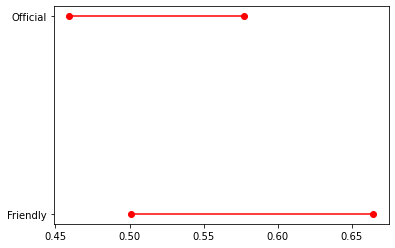

In [220]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci_chi['lb'],df_ci_chi['ub'],range(len(df_ci_chi))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci_chi)),list(df_ci_chi['Typematch']))

The confidence interval for winning friendly games is wider than official games. This means that there is a varied probability of winning where it lies between 50% and nearly 66%. But, the confidence interval for winning official games is narrower and less than friendly games where it lies between 45% and nearly 60%. This shows that the probability of winning friendly games is higher than winning official games. The interpretation for this is that players might be more serious and perform better in official games than friendly games. 

Now examining the effect of fans on winning and losing by looking at home games and away games 

In [247]:
dfchi['home']=(dfchi['home_team']=='Chile')

<ipython-input-247-2a29273bf047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchi['home']=(dfchi['home_team']=='Chile')


In [248]:
dfchi['home'].value_counts()

In [249]:
x=pd.crosstab(dfchi['home'],dfchi['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,23,40,57,120
True,58,70,167,295
All,81,110,224,415


In [250]:
dfchi.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
271,9/11/1910,Chile,Argentina,0,3,Friendly,Viña del Mar,Chile,False,lose,Friendly,True
375,9/21/1913,Chile,Argentina,0,2,Friendly,Viña del Mar,Chile,False,lose,Friendly,True
555,9/11/1920,Chile,Brazil,0,1,Copa América,Viña del Mar,Chile,False,lose,Official,True
556,9/12/1920,Uruguay,Argentina,1,1,Copa América,Viña del Mar,Chile,True,draw,Official,False


In [251]:
x=np.array(x)
x

In [252]:
CI_chiwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_chiwin_home

(0.5095457467912252, 0.6226576430392832)

In [253]:
CI_chiwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_chiwin_away

(0.3856521874260204, 0.5643478125739795)

In [254]:
ci_chiwin = {}
ci_chiwin['home'] = ['Yes','No']
ci_chiwin['lb'] = [CI_chiwin_home[0],CI_chiwin_away[0]]
ci_chiwin['ub'] = [CI_chiwin_home[1],CI_chiwin_away[1]]
df_ci= pd.DataFrame(ci_chiwin)
df_ci

,home,lb,ub
0,Yes,0.509546,0.622658
1,No,0.385652,0.564348


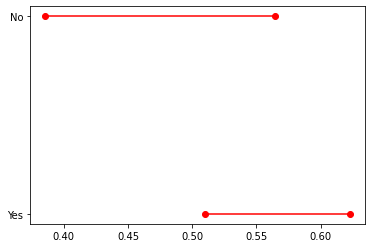

In [255]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The confidence interval of winning at home is higher but less wider than losing. This shows that losing is not as probable as winning a home game. This is because the probability of losing is from 40% to 55%, which is more varied compared to winning at home. The probability of winning at home is from 50% to nearly 63%, this is less varied than the probability of losing. The high probability of winning home games shows how fans affect the team's performance and results positively. 

**Country 2: Croatia**

In [274]:
dfcro=df[df['country']=='Croatia']

In [275]:
dfcro.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
2295,4/2/1940,Croatia,Switzerland,4,0,Friendly,Zagreb,Croatia,False,win
2332,12/8/1940,Croatia,Hungary,1,1,Friendly,Zagreb,Croatia,False,draw
2376,9/28/1941,Croatia,Slovakia,5,2,Friendly,Zagreb,Croatia,False,win
2392,1/18/1942,Croatia,Germany,0,2,Friendly,Zagreb,Croatia,False,lose
2433,9/6/1942,Croatia,Slovakia,6,1,Friendly,Zagreb,Croatia,False,win


In [276]:
conditions = [
    (dfcro['tournament']=='Friendly'),
    (dfcro['tournament']!='Friendly')
    ]

In [277]:
values=['Friendly','Official']

In [278]:
dfcro['typematch'] = np.select(conditions, values)

<ipython-input-278-2d1f6598ec92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcro['typematch'] = np.select(conditions, values)


In [279]:
dfcro['typematch'].value_counts()

Comparing the probability of win/lose/draw by match type:

In [280]:
x=pd.crosstab(dfcro['typematch'],dfcro['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,15,9,39,63
Official,19,5,53,77
All,34,14,92,140


In [281]:
x=np.array(x)
x

In [282]:
CI_crowin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_crowin_friendly
                   

(0.4991321553341658, 0.7389630827610724)

In [283]:
CI_crowin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_crowin_official

(0.5848557178537979, 0.7917676587695788)

Plotting the Confidence Intervals

In [284]:
ci_crowin = {}
ci_crowin['Typematch'] = ['Friendly','Official']
ci_crowin['lb'] = [CI_crowin_friendly[0],CI_crowin_official[0]]
ci_crowin['ub'] = [CI_crowin_friendly[1],CI_crowin_official[1]]
df_ci= pd.DataFrame(ci_crowin)
df_ci

,Typematch,lb,ub
0,Friendly,0.499132,0.738963
1,Official,0.584856,0.791768


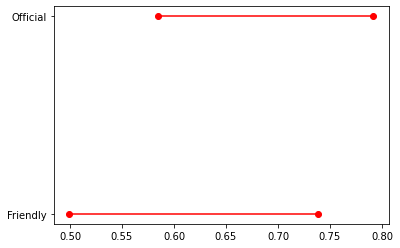

In [285]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The confidence interval for winning friendly games is wider than official games. This means that there is a varied probability of winning where it lies between 50% and nearly 75%. But, the confidence interval for winning official games is narrower and more than friendly games where it lies between 60% and nearly 80%. This shows that the probability of winning official games is higher than winning friendly games. The interpretation for this is that players might be more serious and perform better in official games than friendly games. 

Now examining the effect of fans on winning and losing by looking at home games and away games 

In [286]:
dfcro['home']=(dfcro['home_team']=='Croatia')

<ipython-input-286-cb6676295991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcro['home']=(dfcro['home_team']=='Croatia')


In [288]:
dfcro['home'].value_counts()

In [289]:
x=pd.crosstab(dfcro['home'],dfcro['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,1,1,1,3
True,33,13,91,137
All,34,14,92,140


In [290]:
dfcro.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
2295,4/2/1940,Croatia,Switzerland,4,0,Friendly,Zagreb,Croatia,False,win,Friendly,True
2332,12/8/1940,Croatia,Hungary,1,1,Friendly,Zagreb,Croatia,False,draw,Friendly,True
2376,9/28/1941,Croatia,Slovakia,5,2,Friendly,Zagreb,Croatia,False,win,Friendly,True
2392,1/18/1942,Croatia,Germany,0,2,Friendly,Zagreb,Croatia,False,lose,Friendly,True


In [291]:
x=np.array(x)
x

In [292]:
CI_crowin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_crowin_home

(0.58515354174595, 0.7433136115387214)

In [293]:
CI_crowin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_crowin_away

(0.0, 0.8667679640394788)

In [294]:
ci_crowin = {}
ci_crowin['home'] = ['Yes','No']
ci_crowin['lb'] = [CI_crowin_home[0],CI_crowin_away[0]]
ci_crowin['ub'] = [CI_crowin_home[1],CI_crowin_away[1]]
df_ci= pd.DataFrame(ci_crowin)
df_ci

,home,lb,ub
0,Yes,0.585154,0.743314
1,No,0.000000,0.866768


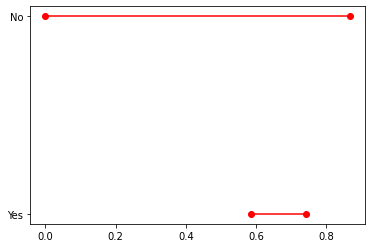

In [295]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The confidence interval of winning at home is way more higher and narrower than losing. The narrow interval shows that it is more probable to happen because it only varies between 60% and 80% which are high percentages, but compared to the confidence interval of losing which goes from 0% until 80%, this is not as accurate because it is too varied. The high probability of winning home games shows how fans affect the team's performance and results positively. 

**Country 3: Saudi Arabia**

In [296]:
dfsau=df[df['country']=='Saudi Arabia']

In [297]:
dfsau.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
6744,12/10/1967,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False,win
7073,1/17/1969,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False,lose
8171,3/16/1972,Saudi Arabia,Kuwait,2,2,Gulf Cup,Riyadh,Saudi Arabia,False,draw
8172,3/17/1972,Qatar,United Arab Emirates,0,1,Gulf Cup,Riyadh,Saudi Arabia,True,lose
8173,3/18/1972,Bahrain,Kuwait,0,2,Gulf Cup,Riyadh,Saudi Arabia,True,lose


In [299]:
conditions = [
    (dfsau['tournament']=='Friendly'),
    (dfsau['tournament']!='Friendly')]

In [300]:
values=['Friendly','Official']

In [301]:
dfsau['typematch'] = np.select(conditions, values)

<ipython-input-301-9864b697675a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsau['typematch'] = np.select(conditions, values)


In [302]:
dfsau['typematch'].value_counts()

Comparing the probability of win/lose/draw by match type:

In [303]:
x=pd.crosstab(dfsau['typematch'],dfsau['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,40,36,77,153
Official,41,56,140,237
All,81,92,217,390


In [304]:
x=np.array(x)
x

In [306]:
CI_sauwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_sauwin_friendly
                                                          

(0.4240428177649449, 0.5824931299474734)

In [307]:
CI_sauwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_sauwin_official

(0.5281171375960512, 0.653317461560067)

In [308]:
ci_sauwin = {}
ci_sauwin['Typematch'] = ['Friendly','Official']
ci_sauwin['lb'] = [CI_sauwin_friendly[0],CI_sauwin_official[0]]
ci_sauwin['ub'] = [CI_sauwin_friendly[1],CI_sauwin_official[1]]
df_ci= pd.DataFrame(ci_sauwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.424043,0.582493
1,Official,0.528117,0.653317


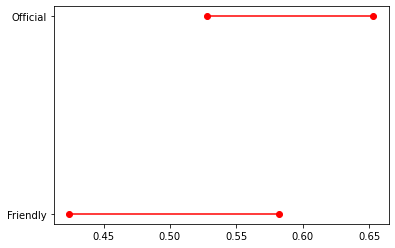

In [309]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The confidence interval for winning friendly games is wider than official games. This means that there is a varied probability of winning where it lies between 40% and nearly 60%. But, the confidence interval for winning official games is narrower and more than friendly games where it lies between nearly 55% and 65%. This shows that the probability of winning official games is higher than winning friendly games. The interpretation for this is that players might be more serious and perform better in official games than friendly games. 

Now examining the effect of fans on winning and losing by looking at home games and away games

In [310]:
dfsau['home']=(dfsau['home_team']=='Saudi Arabia')

<ipython-input-310-bc7e1925a40c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsau['home']=(dfsau['home_team']=='Saudi Arabia')


In [311]:
dfsau['home'].loc[dfsau['home_team']=='Saudi Arabia']

In [313]:
dfsau['home'].value_counts()

In [314]:
x=pd.crosstab(dfsau['home'],dfsau['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,25,41,55,121
True,56,51,162,269
All,81,92,217,390


In [315]:
dfsau.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
6744,12/10/1967,Saudi Arabia,Tunisia,4,0,Friendly,Riyadh,Saudi Arabia,False,win,Friendly,True
7073,1/17/1969,Saudi Arabia,Turkey,1,2,Friendly,Riyadh,Saudi Arabia,False,lose,Friendly,True
8171,3/16/1972,Saudi Arabia,Kuwait,2,2,Gulf Cup,Riyadh,Saudi Arabia,False,draw,Official,True
8172,3/17/1972,Qatar,United Arab Emirates,0,1,Gulf Cup,Riyadh,Saudi Arabia,True,lose,Official,False


In [316]:
x=np.array(x)
x

In [317]:
CI_sauwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_sauwin_home

(0.5437421740284505, 0.6607187925143005)

In [318]:
CI_sauwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_sauwin_away

(0.3658250837826203, 0.5432658253082887)

In [319]:
ci_sauwin = {}
ci_sauwin['home'] = ['Yes','No']
ci_sauwin['lb'] = [CI_sauwin_home[0],CI_sauwin_away[0]]
ci_sauwin['ub'] = [CI_sauwin_home[1],CI_sauwin_away[1]]
df_ci= pd.DataFrame(ci_sauwin)
df_ci

,home,lb,ub
0,Yes,0.543742,0.660719
1,No,0.365825,0.543266


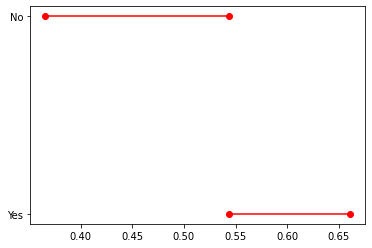

In [320]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The confidence interval of winning at home is way more higher and narrower than losing. The narrow interval shows that it is more probable to happen because it only varies between 55% and 65% which are higher percentages, but compared to the confidence interval of losing which goes from nearly 35% until 55%, it is not as accurate as winning because the difference between the numbers is more. The high probability of winning home games shows how fans affect the team's performance and results positively. 

**Country 4: Japan**

In [321]:
dfjap=df[df['country']=='Japan']

In [322]:
dfjap.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
461,5/7/1917,Japan,Philippines,2,15,Friendly,Tokyo,Japan,False,lose
719,5/22/1923,China PR,Philippines,3,0,Friendly,Osaka,Japan,True,win
720,5/24/1923,Japan,China PR,1,5,Friendly,Osaka,Japan,False,lose
1298,5/27/1930,China PR,Philippines,5,0,Friendly,Tokyo,Japan,True,win
1299,5/29/1930,Japan,China PR,3,3,Friendly,Tokyo,Japan,False,draw


In [323]:
conditions = [
    (dfjap['tournament']=='Friendly'),
    (dfjap['tournament']!='Friendly') ]

In [324]:
values=['Friendly','Official']

In [325]:
dfjap['typematch'] = np.select(conditions, values)

<ipython-input-325-32d41154ffcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfjap['typematch'] = np.select(conditions, values)


In [326]:
dfjap['typematch'].value_counts()

Comparing the probability of win/lose/draw by match type:

In [327]:
x=pd.crosstab(dfjap['typematch'],dfjap['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,27,35,70,132
Official,57,49,117,223
All,84,84,187,355


In [328]:
x=np.array(x)
x

In [329]:
CI_japwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_japwin_friendly
                                                          

(0.44516334139646724, 0.6154427192095934)

In [330]:
CI_japwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_japwin_official

(0.459119115989316, 0.5902082382707736)

In [331]:
ci_japwin = {}
ci_japwin['Typematch'] = ['Friendly','Official']
ci_japwin['lb'] = [CI_japwin_friendly[0],CI_japwin_official[0]]
ci_japwin['ub'] = [CI_japwin_friendly[1],CI_japwin_official[1]]
df_ci= pd.DataFrame(ci_japwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.445163,0.615443
1,Official,0.459119,0.590208


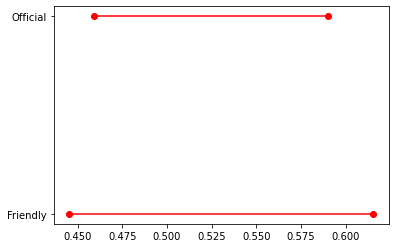

In [106]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

There is no such huge difference between both intervals of winning official and friendly games because the numbers are nearly the same and both intervals vary. This shows that the probability of this happening is the same probability of the other thing happening. This shows that the team performance is nearly the same in all games which shows the seriousness of the players.   

Now examining the effect of fans on winning and losing by looking at home games and away games

In [332]:
dfjap['home']=(dfjap['home_team']=='Japan')

<ipython-input-332-c50c5299faeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfjap['home']=(dfjap['home_team']=='Japan')


In [333]:
x=pd.crosstab(dfjap['home'],dfjap['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,27,29,38,94
True,57,55,149,261
All,84,84,187,355


In [334]:
dfjap.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
461,5/7/1917,Japan,Philippines,2,15,Friendly,Tokyo,Japan,False,lose,Friendly,True
719,5/22/1923,China PR,Philippines,3,0,Friendly,Osaka,Japan,True,win,Friendly,False
720,5/24/1923,Japan,China PR,1,5,Friendly,Osaka,Japan,False,lose,Friendly,True
1298,5/27/1930,China PR,Philippines,5,0,Friendly,Tokyo,Japan,True,win,Friendly,False


In [335]:
x=np.array(x)
x

In [336]:
CI_japwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_japwin_home

(0.5108344803192827, 0.6309279717879971)

In [337]:
CI_japwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_japwin_away

(0.3050483635609801, 0.5034622747368922)

In [338]:
ci_japwin = {}
ci_japwin['home'] = ['Yes','No']
ci_japwin['lb'] = [CI_japwin_home[0],CI_japwin_away[0]]
ci_japwin['ub'] = [CI_japwin_home[1],CI_japwin_away[1]]
df_ci= pd.DataFrame(ci_japwin)
df_ci

,home,lb,ub
0,Yes,0.510834,0.630928
1,No,0.305048,0.503462


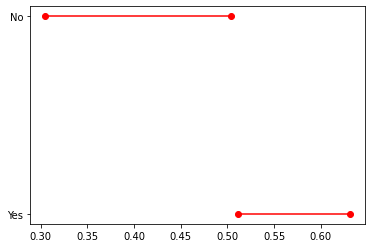

In [339]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The confidence interval of winning at home is higher and narrower than losing. The narrow interval shows that it is more probable to happen because it only varies between 50% and 65% which are higher percentages than losing, but compared to the confidence interval of losing which goes from nearly 30% until 50%, it is not as accurate as winning because the difference between the numbers is more. The high probability of winning home games shows how fans affect the team's performance and results positively. 

**Country 5: Uruguay**

In [340]:
dfuru=df[df['country']=='Uruguay']

In [341]:
dfuru.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
145,7/20/1902,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False,lose
188,8/15/1906,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False,lose
225,8/15/1908,Uruguay,Argentina,2,2,Copa Lipton,Montevideo,Uruguay,False,draw
248,9/19/1909,Uruguay,Argentina,2,2,Copa Newton,Montevideo,Uruguay,False,draw
270,8/15/1910,Uruguay,Argentina,3,1,Copa Lipton,Montevideo,Uruguay,False,win


In [342]:
conditions = [
    (dfuru['tournament']=='Friendly'),
    (dfuru['tournament']!='Friendly')   ]

In [343]:
values=['Friendly','Official']

In [344]:
dfuru['typematch'] = np.select(conditions, values)

<ipython-input-344-03485c55cc80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfuru['typematch'] = np.select(conditions, values)


In [345]:
dfuru['typematch'].value_counts()

Comparing the probability of win/lose/draw by match type:

In [346]:
x=pd.crosstab(dfuru['typematch'],dfuru['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,29,21,54,104
Official,62,48,170,280
All,91,69,224,384


In [347]:
x=np.array(x)
x

In [348]:
CI_uruwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uruwin_friendly
                                                          

(0.4232067314086196, 0.6152548070529189)

In [349]:
CI_uruwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uruwin_official

(0.5499381393724313, 0.6643475749132829)

In [350]:
ci_uruwin = { }
ci_uruwin['Typematch'] = ['Friendly','Official']
ci_uruwin['lb'] = [CI_uruwin_friendly[0],CI_uruwin_official[0]]
ci_uruwin['ub'] = [CI_uruwin_friendly[1],CI_uruwin_official[1]]
df_ci= pd.DataFrame(ci_uruwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.423207,0.615255
1,Official,0.549938,0.664348


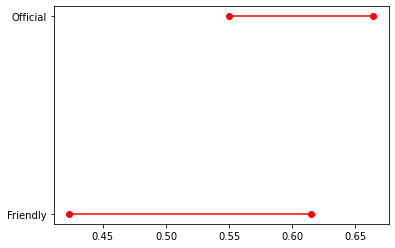

In [351]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The confidence interval for winning friendly games is wider than official games. This means that there is a varied probability of winning where it lies between 40% and nearly 60%. But, the confidence interval for winning official games is narrower and more than friendly games where it lies between nearly 55% and nearly 65%. This shows that the probability of winning official games is higher than winning friendly games. The interpretation for this is that players might be more serious and perform better in official games than friendly games. 

Now examining the effect of fans on winning and losing by looking at home games and away games

In [354]:
dfuru['home']=(dfuru['home_team']=='Uruguay')

<ipython-input-354-8b8ab43b5171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfuru['home']=(dfuru['home_team']=='Uruguay')


In [355]:
dfuru['home'].value_counts()

In [356]:
x=pd.crosstab(dfuru['home'],dfuru['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,15,22,47,84
True,76,47,177,300
All,91,69,224,384


In [357]:
dfuru.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
145,7/20/1902,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False,lose,Friendly,True
188,8/15/1906,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False,lose,Official,True
225,8/15/1908,Uruguay,Argentina,2,2,Copa Lipton,Montevideo,Uruguay,False,draw,Official,True
248,9/19/1909,Uruguay,Argentina,2,2,Copa Newton,Montevideo,Uruguay,False,draw,Official,True


In [358]:
x=np.array(x)
x

In [359]:
CI_uruwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uruwin_home

(0.5343448448411736, 0.6456551551588263)

In [360]:
CI_uruwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uruwin_away

(0.4533593989396916, 0.6656882201079274)

In [361]:
ci_uruwin = {}
ci_uruwin['home'] = ['Yes','No']
ci_uruwin['lb'] = [CI_uruwin_home[0],CI_uruwin_away[0]]
ci_uruwin['ub'] = [CI_uruwin_home[1],CI_uruwin_away[1]]
df_ci= pd.DataFrame(ci_uruwin)
df_ci

,home,lb,ub
0,Yes,0.534345,0.645655
1,No,0.453359,0.665688


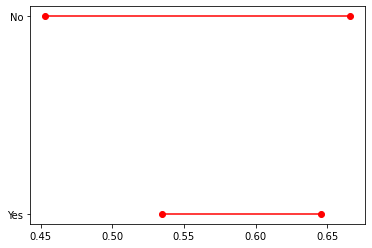

In [362]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The confidence interval of winning at home is higher and narrower than losing. The narrow interval shows that it is more probable to happen because it only varies between nearly 55% and 65%, but compared to the confidence interval of losing which goes from nearly 45% until 65%, it is not as accurate as winning because the difference between the numbers is more. The high probability of winning home games shows how fans affect the team's performance and results positively. 

**Conclusion**

There are some countries who are stronger than others in terms of winning official games. The highest probability for winning official games in my chosen countries is Croatia and the lowest is Chile. This shows the difference in team strengths which is based on quality of players and coaches. 

Also, there are some countries stronger than others in terms of winning at home. The highest probability of winning at home is Croatia, the lowest is Saudi Arabia. This shows how Croatian players are psychologically affected by playing at home because it leads them to perform better leading to better results.  

Both of those comparisons show that the Croatian team is a strong leading team because it has a high probability of winning and it performs better under pressure such as being at home playing in their own country. 